In [1]:
import pandas as pd
import numpy as np
import spatialdata_io

import matplotlib.pyplot as plt

from scipy.stats import spearmanr, pearsonr

/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarnin

# Plotting function

In [14]:
def corr_plot(sample1, sample2, sample1_name, sample2_name, filename):
    s1_sum_counts = pd.DataFrame(sample1.tables['table'].X.sum(axis=0).T, columns=[sample1_name], index=sample1.tables['table'].var.index)
    s2_sum_counts = pd.DataFrame(sample2.tables['table'].X.sum(axis=0).T, columns=[sample2_name], index=sample2.tables['table'].var.index)

    all_counts = pd.merge(left=s1_sum_counts, left_index=True, right=s2_sum_counts, right_index=True)
    stat, p = spearmanr(all_counts[sample1_name], all_counts[sample2_name])

    plt.figure(figsize=(3,3), constrained_layout=True)
    plt.axline((0,0), slope=1, linestyle='dashed', c='gray')
    plt.scatter(all_counts[sample1_name], all_counts[sample2_name])
    # plt.axline((0,0), slope=1, linestyle='dashed', c='gray')
    plt.loglog()
    plt.xlim(100, 5e6)
    plt.ylim(100, 5e6)
    plt.xlabel(f'{sample1_name} counts')
    plt.ylabel(f'{sample2_name} counts')
    plt.title(f'Spearman R:{stat:.2f}')
    plt.savefig(f'../Figures/CompQC/{filename}.png', dpi=300)
    plt.show()

# Sample loading

In [2]:
P7513_Xen = spatialdata_io.xenium('/mnt/ISS2/Mathieu/Xenium/20250917__131434__MB_RUN2_170925/output-XETG00443__0069511__P7513__20250917__131459/')

INFO     reading                                                                                                   
         /mnt/ISS2/Mathieu/Xenium/20250917__131434__MB_RUN2_170925/output-XETG00443__0069511__P7513__20250917__1314
         59/cell_feature_matrix.h5                                                                                 


/tmp/ipykernel_2156655/301532157.py:1: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  P7513_Xen = spatialdata_io.xenium('/mnt/ISS2/Mathieu/Xenium/20250917__131434__MB_RUN2_170925/output-XETG00443__0069511__P7513__20250917__131459/')


In [3]:
P7513_Mer = spatialdata_io.merscope('/mnt/ISS2/Mathieu/MERSCOPE_output/202509261108_P7513-2_VMSC19502/region_R2/')

INFO     The column "global_x" has now been renamed to "x"; the column "x" was already present in the dataframe,   
         and will be dropped.                                                                                      
INFO     The column "global_y" has now been renamed to "y"; the column "y" was already present in the dataframe,   
         and will be dropped.                                                                                      


/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/functools.py:926: UserWarning: The index of the dataframe is not monotonic increasing. It is recommended to sort the data to adjust the order of the index before calling .parse() (or call `parse(sort=True)`) to avoid possible problems due to unknown divisions.
  return method.__get__(obj, cls)(*args, **kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [4]:
P7513_MerIF = spatialdata_io.merscope('/mnt/ISS2/Mathieu/MERSCOPE_output/202510031237_MERXEN-if-p7513_VMSC19502/region_R1/')

INFO     The column "global_x" has now been renamed to "x"; the column "x" was already present in the dataframe,   
         and will be dropped.                                                                                      
INFO     The column "global_y" has now been renamed to "y"; the column "y" was already present in the dataframe,   
         and will be dropped.                                                                                      


/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/functools.py:926: UserWarning: The index of the dataframe is not monotonic increasing. It is recommended to sort the data to adjust the order of the index before calling .parse() (or call `parse(sort=True)`) to avoid possible problems due to unknown divisions.
  return method.__get__(obj, cls)(*args, **kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [9]:
P7113_Xen = spatialdata_io.xenium('/mnt/ISS2/Mathieu/Xenium/20250917__131434__MB_RUN2_170925/output-XETG00443__0069511__P7113__20250917__131459/')

INFO     reading                                                                                                   
         /mnt/ISS2/Mathieu/Xenium/20250917__131434__MB_RUN2_170925/output-XETG00443__0069511__P7113__20250917__1314
         59/cell_feature_matrix.h5                                                                                 


/tmp/ipykernel_2156655/3670256310.py:1: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  P7113_Xen = spatialdata_io.xenium('/mnt/ISS2/Mathieu/Xenium/20250917__131434__MB_RUN2_170925/output-XETG00443__0069511__P7113__20250917__131459/')


In [10]:
P7113_Mer = spatialdata_io.merscope('/mnt/ISS2/Mathieu/MERSCOPE_output/202509282045_MerXen-P7113-2_VMSC19502/region_R1/')

INFO     The column "global_x" has now been renamed to "x"; the column "x" was already present in the dataframe,   
         and will be dropped.                                                                                      
INFO     The column "global_y" has now been renamed to "y"; the column "y" was already present in the dataframe,   
         and will be dropped.                                                                                      


/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/functools.py:926: UserWarning: The index of the dataframe is not monotonic increasing. It is recommended to sort the data to adjust the order of the index before calling .parse() (or call `parse(sort=True)`) to avoid possible problems due to unknown divisions.
  return method.__get__(obj, cls)(*args, **kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [11]:
P7113_MerIF = spatialdata_io.merscope('/mnt/ISS2/Mathieu/MERSCOPE_output/202510051205_MerXenIF-P7113_VMSC19502/region_R1/')

INFO     The column "global_x" has now been renamed to "x"; the column "x" was already present in the dataframe,   
         and will be dropped.                                                                                      
INFO     The column "global_y" has now been renamed to "y"; the column "y" was already present in the dataframe,   
         and will be dropped.                                                                                      


/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/functools.py:926: UserWarning: The index of the dataframe is not monotonic increasing. It is recommended to sort the data to adjust the order of the index before calling .parse() (or call `parse(sort=True)`) to avoid possible problems due to unknown divisions.
  return method.__get__(obj, cls)(*args, **kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


# Plotting

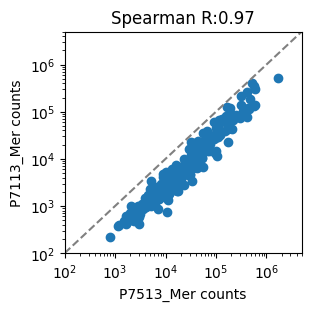

In [15]:
corr_plot(sample1=P7513_Mer, sample1_name='P7513_Mer', sample2=P7113_Mer, sample2_name='P7113_Mer', filename='P7513_P7113_TX')

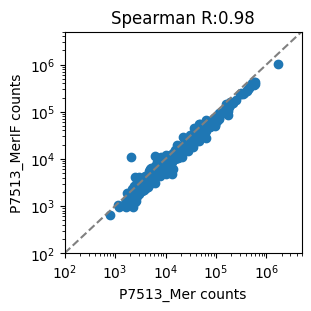

In [16]:
corr_plot(sample1=P7513_Mer, sample1_name='P7513_Mer', sample2=P7513_MerIF, sample2_name='P7513_MerIF', filename='P7513_TX_IF')

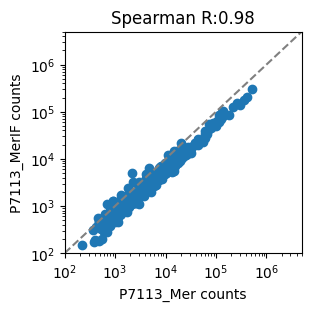

In [17]:
corr_plot(sample1=P7113_Mer, sample1_name='P7113_Mer', sample2=P7113_MerIF, sample2_name='P7113_MerIF', filename='P7113_TX_IF')

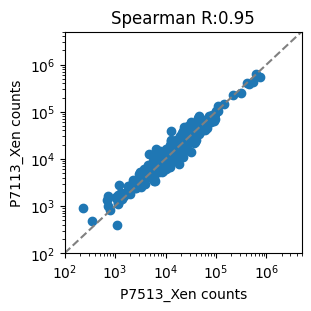

In [18]:
corr_plot(sample1=P7513_Xen, sample1_name='P7513_Xen', sample2=P7113_Xen, sample2_name='P7113_Xen', filename='P7513_P7513_Xen')

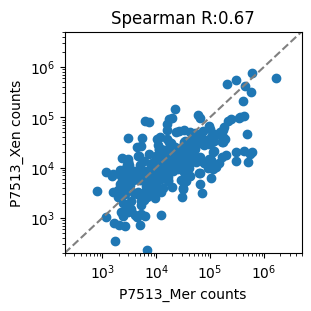

In [7]:
corr_plot(sample1=P7513_Mer, sample1_name='P7513_Mer', sample2=P7513_Xen, sample2_name='P7513_Xen', filename='P7513_Mer_Xen')

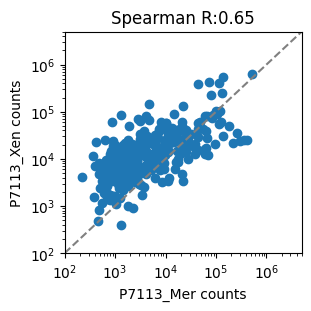

In [19]:
corr_plot(sample1=P7113_Mer, sample1_name='P7113_Mer', sample2=P7113_Xen, sample2_name='P7113_Xen', filename='P7113_Mer_Xen')